In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from utils.pitch_tier import get_pitch_tier
import seaborn
import pandas as pd
from pydub import AudioSegment
import utils.pitch_tier

In [3]:
wav_path = "examples/12345.wav"


In [4]:
wav = AudioSegment.from_file(wav_path)

wav

In [5]:
tier = get_pitch_tier("examples/12345.wav")

/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/extraer-pitch-track.praat /home/marat/Dropbox/doctorado/materias/habla/tp/examples/12345.wav /tmp/tmpdIdzld.PitchTier 50 180


In [6]:
time, values = tier["time"], tier["values"]


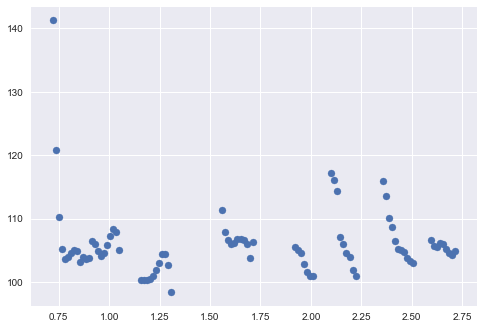

In [7]:
scatter(time, values)

In [8]:
mu = values.mean()
increase_factor = 0.2

In [9]:
l1 = time.min () + 0.8 * (time.max() - time.min())
l2 = time.min () + 1.1 * (time.max() - time.min())

""" Hice la cuenta de esto.."""
a = (-increase_factor * mu) / float((l2 - l1)/2)**2

def f(x):
    if l1 <= x and x <= l2:
        return a * (x - l1) * (x - l2)
    else:
        return 0

t = np.arange(0, time.max(), 0.01)
fv = np.vectorize(f)

x = fv(time)

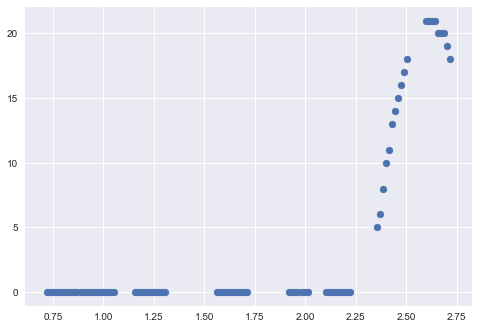

In [10]:
scatter(time, x)

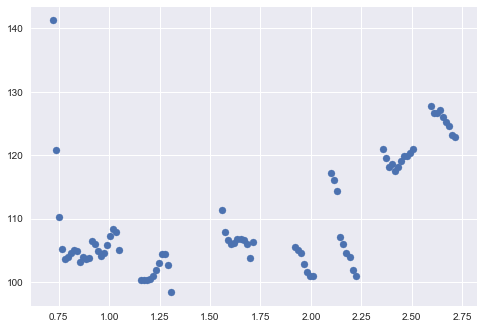

In [11]:
scatter(time, x + values)

In [12]:
import copy

wav_path = "examples/12345.wav"

def questionify_tier(tier, increase_factor = 0.2, limit1=0.8, limit2=1.1):
    time, values = tier["time"], tier["values"]
    
    len(time)
    l1 = time.min () + limit1 * (time.max() - time.min())
    l2 = time.min () + limit2 * (time.max() - time.min())
    

    """ Hice la cuenta de esto.."""
    a = (-increase_factor * mu) / float((l2 - l1)/2)**2

    def f(x):
        if l1 <= x and x <= l2:
            return a * (x - l1) * (x - l2)
        else:
            return 0

    t = np.arange(0, time.max(), 0.01)
    fv = np.vectorize(f)
    
    scatter(t, fv(t))
    x = fv(time)
    
    scatter(time, x+values, color="red")
    scatter(time, values, color="blue")
    new_tier = copy.deepcopy(tier)
    
    new_tier['values'] = x + values
    
    return new_tier

/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/reemplazar-pitch-track.praat /home/marat/Dropbox/doctorado/materias/habla/tp/examples/12345.wav /tmp/tmpZwmBuN.PitchTier /tmp/question.wav 50 180


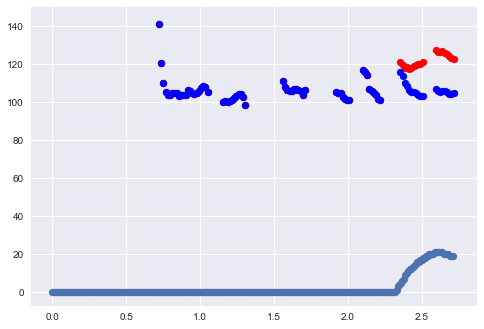

In [13]:
question_tier = questionify_tier(tier, increase_factor = 0.2, limit1=0.8, limit2=1.1)

utils.pitch_tier.replace_pitch_tier(wav_path, question_tier, "/tmp/question.wav")

In [14]:
AudioSegment.from_file("/tmp/question.wav")

/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/extraer-pitch-track.praat /home/marat/Dropbox/doctorado/materias/habla/tp/examples/kAkamAla.wav /tmp/tmphQWgE5.PitchTier 50 180
/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/reemplazar-pitch-track.praat /home/marat/Dropbox/doctorado/materias/habla/tp/examples/kAkamAla.wav /tmp/tmp4PqXg5.PitchTier /tmp/tmpyvuoz6.wav 50 180


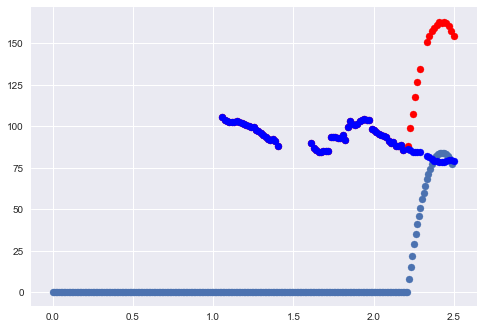

In [15]:
import tempfile

def questionify(wav_path, **kwargs):
    tier = get_pitch_tier(wav_path)
    
    question_tier = questionify_tier(tier, **kwargs)

    tmp_wav = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
    
    utils.pitch_tier.replace_pitch_tier(wav_path, question_tier, tmp_wav.name)
    
    return AudioSegment.from_file(tmp_wav.name)

wav_path = "examples/kAkamAla.wav"

wav = AudioSegment.from_file(wav_path)

wav_question = questionify(wav_path, increase_factor=0.8)
    
display(wav)   
    
wav_question

/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/extraer-pitch-track.praat /home/marat/Dropbox/doctorado/materias/habla/tp/examples/recorded/kAkamAla.wav /tmp/tmpCPWB1X.PitchTier 50 180
/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/reemplazar-pitch-track.praat /home/marat/Dropbox/doctorado/materias/habla/tp/examples/recorded/kAkamAla.wav /tmp/tmpUu6TPt.PitchTier /tmp/tmp51cloD.wav 50 180


4.0


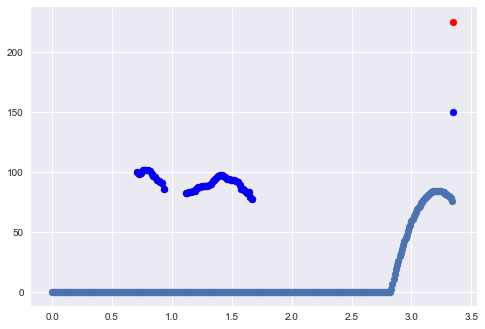

In [16]:
wav_path = "examples/recorded/kAkamAla.wav"

wav = AudioSegment.from_file(wav_path)

wav_question = questionify(wav_path, increase_factor=0.8)
    
display(wav)   
    
print wav_question.duration_seconds

# Probemos con lo que generamos nosotros. Estos ejemplos generales son muy difíciles

In [17]:
from tts import split_word_into_diphones
import ConfigParser

word = "kAkamAla"

config = ConfigParser.ConfigParser()
config.optionxform = str
config.read("config.ini")

word_diphones = split_word_into_diphones(word)

resp = AudioSegment.silent(0)
print resp.duration_seconds
print word_diphones
current_sec = .0
span = []

for phono in word_diphones:
    diphone = AudioSegment.from_wav(config.get("JMP", phono))
    span.append({
        'diphone': phono, 
        'span': (current_sec, current_sec + diphone.duration_seconds) 
    })
    
    current_sec += diphone.duration_seconds
    resp = resp + diphone

wav = resp

0.0
['-k', 'kA', 'Ak', 'ka', 'am', 'mA', 'Al', 'la', 'a-']


In [18]:
temp_wav = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)

wav.export(temp_wav, format="wav")

wav

In [19]:

def questionify_tier(tier, limit1, limit2, increase_factor=0.2):
    time, values = tier["time"], tier["values"]

    """ Hice la cuenta de esto.."""
    a = (-increase_factor * mu) / float((limit2 - limit1)/2)**2

    def f(x):
        if limit1 <= x and x <= limit2:
            return a * (x - l1) * (x - l2)
        else:
            return 0

    t = np.arange(0, time.max(), 0.01)
    fv = np.vectorize(f)
    
    scatter(t, fv(t))
    x = fv(time)
    
    scatter(time, x+values, color="red")
    scatter(time, values, color="blue")
    new_tier = copy.deepcopy(tier)
    
    new_tier['values'] = x + values
    
    return new_tier


Bueno, ahora vamos a hacer el salto en las dos últimas sílabas

por ejemplo

kAkamAla debería tener la parábola empezando en el difono `am`

In [20]:
def questionify(wav_path, **kwargs):
    tier = get_pitch_tier(wav_path)
    
    question_tier = questionify_tier(tier, **kwargs)

    tmp_wav = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
    
    utils.pitch_tier.replace_pitch_tier(wav_path, question_tier, tmp_wav.name)
    
    return AudioSegment.from_file(tmp_wav.name)

In [21]:
print wav.duration_seconds
print span

1.57875
[{'diphone': '-k', 'span': (0.0, 0.012625)}, {'diphone': 'kA', 'span': (0.012625, 0.26275)}, {'diphone': 'Ak', 'span': (0.26275, 0.5404374999999999)}, {'diphone': 'ka', 'span': (0.5404374999999999, 0.7273124999999999)}, {'diphone': 'am', 'span': (0.7273124999999999, 0.8246874999999999)}, {'diphone': 'mA', 'span': (0.8246874999999999, 0.9768749999999999)}, {'diphone': 'Al', 'span': (0.9768749999999999, 1.199625)}, {'diphone': 'la', 'span': (1.199625, 1.329625)}, {'diphone': 'a-', 'span': (1.329625, 1.57875)}]


0.72 1.4
/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/extraer-pitch-track.praat /tmp/tmp57vONR.wav /tmp/tmpf5N23T.PitchTier 50 180
/home/marat/voice/soft/praat/praat /home/marat/Dropbox/doctorado/materias/habla/tp/scripts/manipular-pitch/reemplazar-pitch-track.praat /tmp/tmp57vONR.wav /tmp/tmpg0qkfo.PitchTier /tmp/tmp7XGMN3.wav 50 180


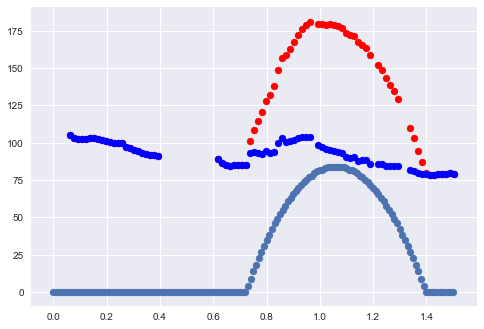

In [24]:
import tempfile



l1 = 0.72
l2 = 1.4

print l1, l2

questionify(temp_wav.name, limit1=l1, limit2=l2, increase_factor=0.8)